In [1]:
import matplotlib.pyplot as plt
import numpy as np
zero_mat=np.ones((8,8))
zero_mat[2:6,2:6]*=-1
zero_mat=zero_mat.reshape((1,64))

one_mat=-np.ones((8,8))
one_mat[:,3:5]*=-1
one_mat[:2,2]*=-1
one_mat=one_mat.reshape((1,64))
inputs=np.zeros((2,64))
inputs[0,:]=zero_mat.copy()
inputs[1,:]=one_mat.copy()

In [2]:
# Step 0 Weight initialization
R=2
N=64
#Weights
W=np.zeros((N,N))-R*np.identity(N)
for i in range(R):
  W=W+np.matmul(inputs[i].reshape(N,1),inputs[i].reshape(N,1).T)

# Testing Memory

In [3]:
sum=0
for r in range(2):
  d=np.sign(np.matmul(inputs[r,:],W))-inputs[r,:]
  # print(d)
  sum+=np.sum(d)
if sum==0 :
  print("Two Number Targets have been succesfully saved in Memory")

Two Number Targets have been succesfully saved in Memory


#for 0 noisy pattern

In [4]:
# 30% noise means nearly 19 or 20 pixels to be noisy for each number
rate=0.3
inputs_noisy=inputs.copy()
inputs_noisy=inputs_noisy.reshape((R,N))
ind=np.zeros(int(rate*N)).astype('int32')
for t in range(R):
  ind=np.random.choice(N, int(N*rate),replace=False)
  inputs_noisy[t,ind]=-1*inputs[t,ind]


Done 126


Text(0.5, 0, 'iterations')

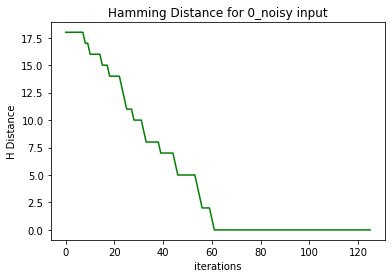

In [5]:
q=0  # changeeee 0or 1 for the input type

counter=-1
pp=0
random_ind=np.random.choice(N,N,replace=False).reshape(-1,1)
flag=1
y=inputs_noisy[q].copy()
# delta=np.zeros(64)
y_in=np.zeros(N)
y_prime=y.copy()
history=np.zeros(200)
index=-1
while(flag):    #check she
  for i in random_ind:
    index+=1
    counter+=1
    y_in[i]=inputs_noisy[q,i]+np.matmul(y,W[:,i])
    y[i]=np.sign(y_in[i])
    # if((y-inputs[q]==0).all()):
    history[index]=np.count_nonzero(y-inputs[q])  #Hamming Distance
    if((y-y_prime==0).all()):
      pp+=1
      # print(pp)
    else:
      pp=0
    if(pp>N):           #The criterion is such that in a complete epoch y doesnt change at all
      print('Done',counter)
      flag=0
      break
    y_prime=y.copy()

vv=np.arange(counter)
plt.plot(vv,history[:counter],'g')
plt.title("Hamming Distance for %d_noisy input"%q)
plt.ylabel('H Distance')
plt.xlabel('iterations')
# plt.xlim([0,100])

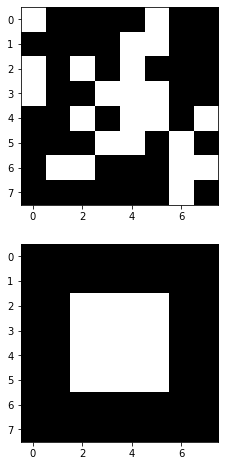

In [6]:
import matplotlib.pyplot as plt
# g=g.reshape((8,8))
g1=y_prime.reshape((8,8))
plt.figure(figsize=(8,8))
plt.title("zero input/output")
plt.subplot(211)
plt.imshow(inputs_noisy[q].reshape((8,8)),cmap='Greys')
plt.subplot(212)
plt.imshow(g1,cmap='Greys')

#for 1 noisy pattern

Done 128


Text(0.5, 0, 'iterations')

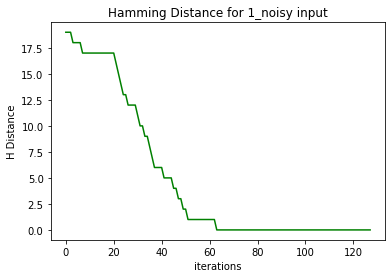

In [7]:
q=1  # changeeee 0or 1 for the input type

counter=-1
pp=0
random_ind=np.random.choice(N,N,replace=False).reshape(-1,1)
flag=1
y=inputs_noisy[q].copy()
# delta=np.zeros(64)
y_in=np.zeros(N)
y_prime=y.copy()
history=np.zeros(200)
index=-1
while(flag):    #check she
  for i in random_ind:
    index+=1
    counter+=1
    y_in[i]=inputs_noisy[q,i]+np.matmul(y,W[:,i])
    y[i]=np.sign(y_in[i])
    # if((y-inputs[q]==0).all()):
    history[index]=np.count_nonzero(y-inputs[q])  #Hamming Distance
    if((y-y_prime==0).all()):
      pp+=1
      # print(pp)
    else:
      pp=0
    if(pp>N):           #The criterion is such that in a complete epoch y doesnt change at all
      print('Done',counter)
      flag=0
      break
    y_prime=y.copy()

vv=np.arange(counter)
plt.plot(vv,history[:counter],'g')
plt.title("Hamming Distance for %d_noisy input"%q)
plt.ylabel('H Distance')
plt.xlabel('iterations')
# plt.xlim([0,100])

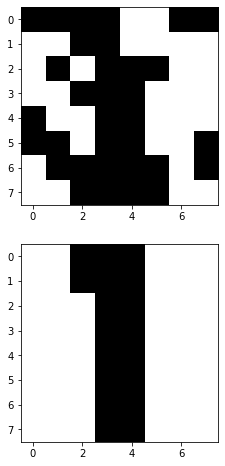

In [8]:
import matplotlib.pyplot as plt
g1=y_prime.reshape((8,8))
# g=g.reshape((8,8))
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.imshow(inputs_noisy[q].reshape((8,8)),cmap='Greys')
plt.subplot(212)
plt.imshow(g1,cmap='Greys')

# Part C

In [9]:
np.count_nonzero(inputs[0,:]-inputs[1,:])

46